In [1]:
# imports
import os
import pandas as pd
import numpy as np
import scipy.stats as scs

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols # ordinary least squares

# read dataset
file_path = os.path.realpath('../project/assets/iris_clean.csv') # importing cleaned data (from cleaning_data.ipynb)
iris = pd.read_csv(file_path)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


---
## Initial Data Exploration

### Quick look at various values in the dataset

No missing values in any of the columns

In [2]:
iris.isna().sum() # sum of all nan-values in dataset

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Equal amount of measurements for all species

In [3]:
iris["species"].value_counts() # count of all values (unique values) in species column

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Values for the dataset as a whole

In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Values for the various species in the dataset  

At a glance we can see that setosa has much smaller petals, otherwise the min and max values tend to go into each other between the species

In [5]:
for species in iris["species"].unique(): # loop through unique species
    print(f"{species.capitalize()}:")
    display(iris[iris["species"] == species].describe()) # describe dataset for that unique species

Setosa:


,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


Versicolor:


,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


Virginica:


,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


Looking only at mean values for the different species

In [6]:
for species in iris["species"].unique(): # loop through unique species
    print(f"Mean values for {species}:\n{iris[iris['species'] == species].mean(numeric_only = True)}\n") # print mean of all numeric columns

Mean values for setosa:
sepal_length    5.006
sepal_width     3.418
petal_length    1.464
petal_width     0.244
dtype: float64

Mean values for versicolor:
sepal_length    5.936
sepal_width     2.770
petal_length    4.260
petal_width     1.326
dtype: float64

Mean values for virginica:
sepal_length    6.588
sepal_width     2.974
petal_length    5.552
petal_width     2.026
dtype: float64



---
## Petal Measurements

### Looking at Petal Point Distribution

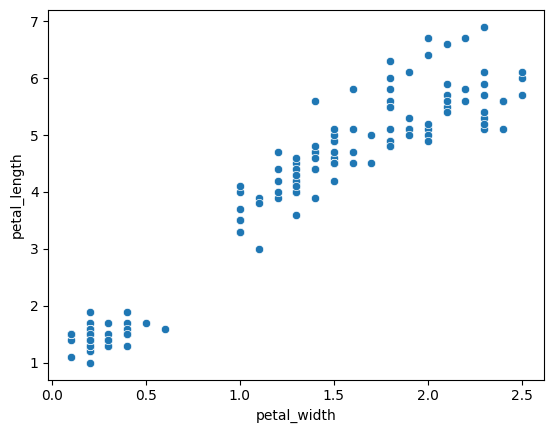

In [7]:
sns.scatterplot(iris, x = "petal_width", y = "petal_length");

Using lmplot to see a regression line

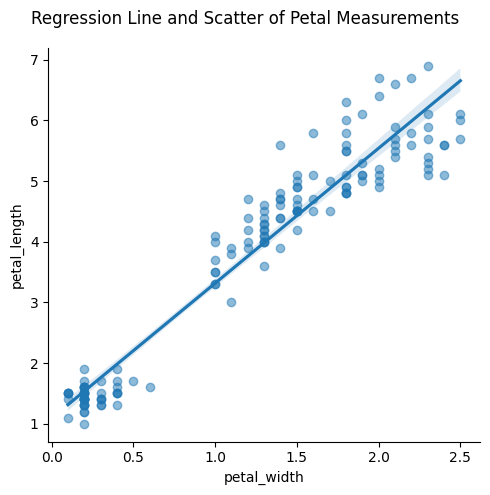

In [8]:
# plotting petal width - length for entire dataset
# setting alpha through scatter_kws to better show overlapping points
sns.lmplot(iris, x = "petal_width", y = "petal_length", scatter_kws = dict(alpha = 0.5))
plt.suptitle("Regression Line and Scatter of Petal Measurements")

plt.tight_layout()

# plt.savefig("assets/petal_regression_scatter", bbox_inches = "tight")

It could also be better to look at each species individually like the below graph  
In this case however, it seems like the correlation will be very strong without dividing the data further

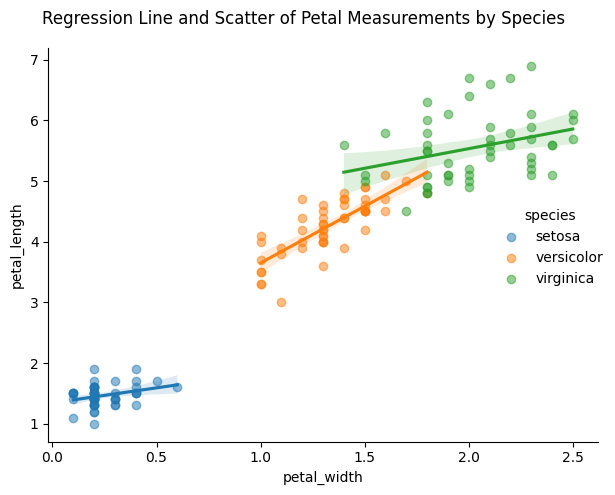

In [9]:
# plotting petal width - length divided by species
# setting alpha through scatter_kws to better show overlapping points
sns.lmplot(iris, x = "petal_width", y = "petal_length", hue = "species", scatter_kws = dict(alpha = 0.5))
plt.suptitle("Regression Line and Scatter of Petal Measurements by Species")

plt.tight_layout()

# plt.savefig("assets/petal_species_regression_scatter", bbox_inches = "tight")

---
## Sepal Measurements

### Looking at Sepal Point Distribution

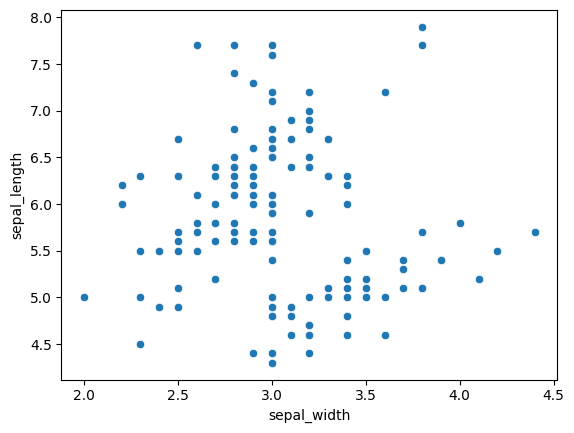

In [10]:
sns.scatterplot(iris, x = "sepal_width", y = "sepal_length");

We can still draw a regression line, but it's clear that the residuals are much larger for sepals than it was for petals  

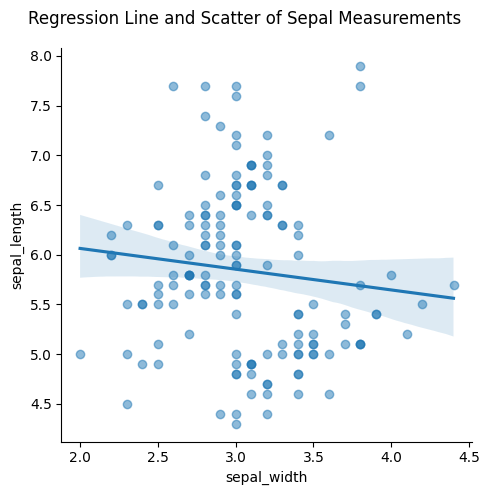

In [11]:
# plotting sepal width - length divided for entire dataset
# setting alpha through scatter_kws to better show overlapping points
sns.lmplot(iris, x = "sepal_width", y = "sepal_length", scatter_kws = dict(alpha = 0.5));
plt.suptitle("Regression Line and Scatter of Sepal Measurements")

plt.tight_layout()

# plt.savefig("assets/sepal_regression_scatter", bbox_inches = "tight")

In this case it might be more relevant to look at the data based on each species, as we can see more clear trends in the data, especially for setosa

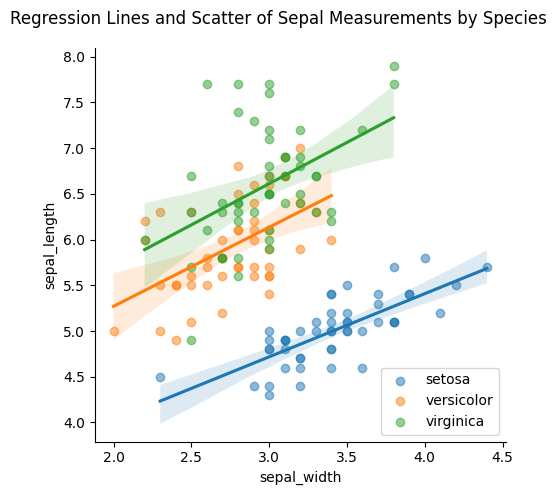

In [12]:
# plotting sepal width - length divided by species
# setting alpha through scatter_kws to better show overlapping points
# hiding legend since lmplot has no control over legend position, using plt.legend below to set it instead
sns.lmplot(iris, x = "sepal_width", y = "sepal_length", hue = "species", scatter_kws = dict(alpha = 0.5), legend = False)
plt.suptitle("Regression Lines and Scatter of Sepal Measurements by Species")
plt.legend(loc = "best") # setting legend position to avoid overlap

plt.tight_layout()

# plt.savefig("assets/sepal_species_regression_scatter", bbox_inches = "tight")

### Other Measurements

Looking at point distribution for the dataset as a whole

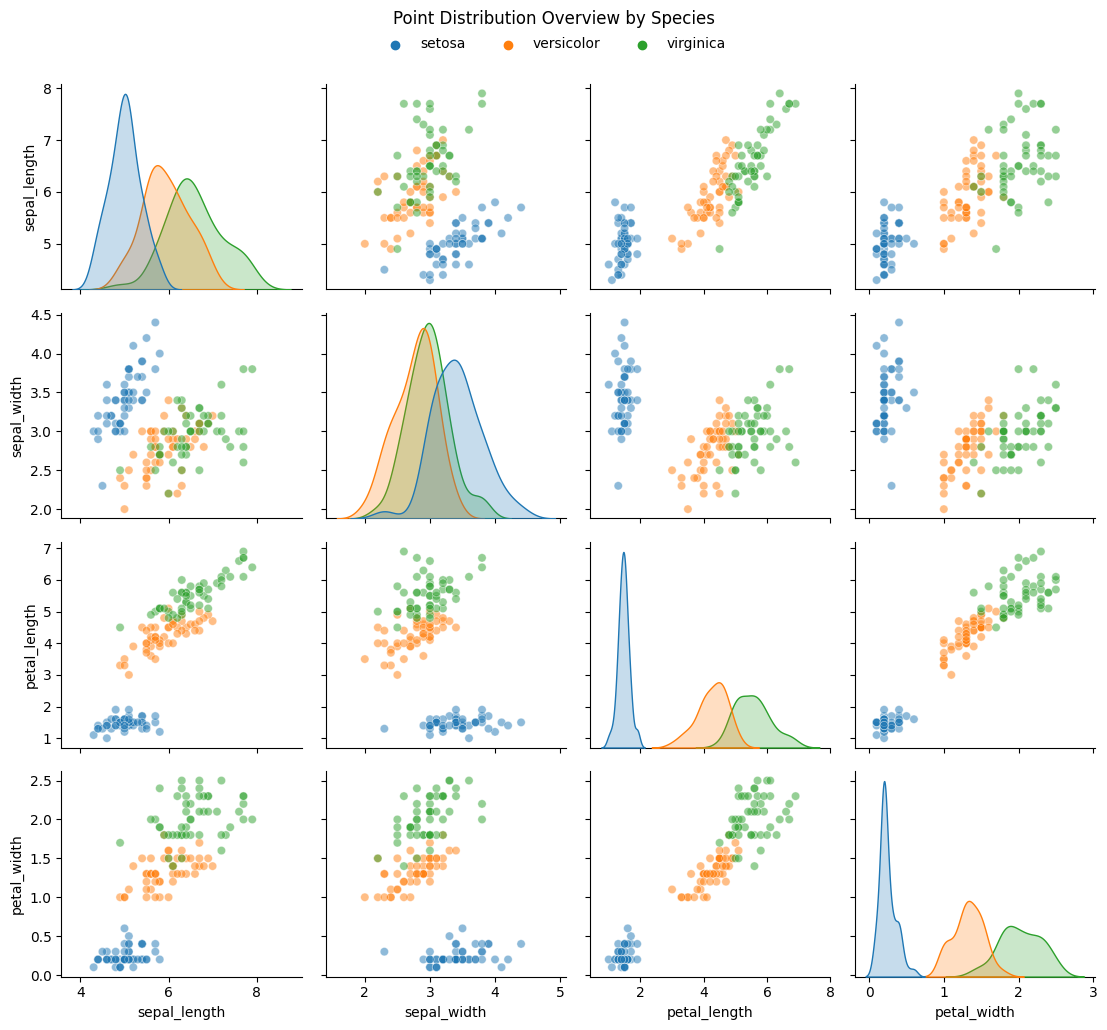

In [13]:
# plotting entire dataset, pairplot makes a grid of all columns * all columns
# setting hue to "species" to show which points belong to which species
# setting alpha through plot_kws to better show overlapping points
# saving plot as chart for use in styling legend
chart = sns.pairplot(iris, hue = "species", plot_kws = dict(alpha = 0.5))

# moving legend to top center, bbox param sets position to 50% sideways, and 101% vertically, leaving it right above the plots
# using chart as a first parameter to show which plot to move the legend for
sns.move_legend(chart, "upper center", bbox_to_anchor = (0.5, 1.01), ncol = 3, title = "")

 # moving title up to 102.5% to end up just above styled legend
plt.suptitle("Point Distribution Overview by Species", y = 1.025)

plt.tight_layout()

# plt.savefig("assets/point_distribution_overview", bbox_inches = "tight")

---

## Correlation

Note that below plot is for r-squared, in other words values below 0-1 where a higher value represents a larger correlation (positive or negative)

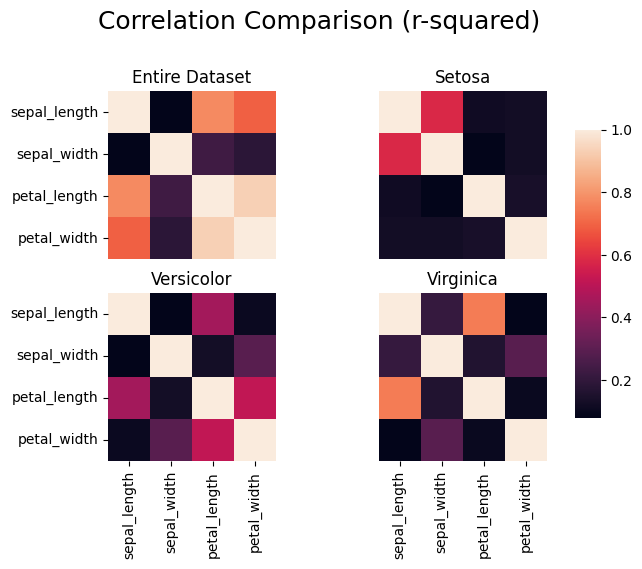

In [14]:
# creating variables of correlations to use in plot below, containing the dataset as a whole, and for each species separately
corr = iris.corr(numeric_only = True)
corr_setosa = iris[iris["species"] == "setosa"].corr(numeric_only = True)
corr_versicolor = iris[iris["species"] == "versicolor"].corr(numeric_only = True)
corr_virginica = iris[iris["species"] == "virginica"].corr(numeric_only = True)

fig, axs = plt.subplots(2, 2) # create a 2x2 plot (with 4 subplots)
cbar_ax = fig.add_axes([.9, .2, .04, .6]) # position and sizing of ax for color bar

fig.suptitle("Correlation Comparison (r-squared)", y = 1.05, size = 18)

# plotting heatmaps for correlation variables in subplots
# not looping this part as each subplot requires different settings based on its position
# hiding xticklabels for the uppermost subplots, hiding yticklabeld for the leftmost subplots
# hiding all colorbars except for one, and applying cbar_ax values to it to set its position and size

ax = plt.subplot(2, 2, 1) # first plot
sns.heatmap(corr**2, ax = ax, cbar = False, xticklabels = False)
ax.set_title("Entire Dataset")
ax.set_aspect('equal')

ax = plt.subplot(2, 2, 2) # second plot
sns.heatmap(corr_setosa**2, ax = ax, cbar = False, xticklabels = False, yticklabels = False)
ax.set_title("Setosa")
ax.set_aspect('equal')

ax = plt.subplot(2, 2, 3) # third plot
sns.heatmap(corr_versicolor**2, ax = ax, cbar = False)
ax.set_title("Versicolor")
ax.set_aspect('equal')

ax = plt.subplot(2, 2, 4) # fourth plot
sns.heatmap(corr_virginica**2, ax = ax, cbar_ax = cbar_ax, yticklabels = False)
ax.set_title("Virginica")
ax.set_aspect('equal')

# plt.savefig("assets/correlation_heatmap", bbox_inches = "tight")

In [15]:
corr**2 # exact values of correlations (r-squared) for entire dataset

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.011962,0.759955,0.669048
sepal_width,0.011962,1.000000,0.176834,0.127124
petal_length,0.759955,0.176834,1.000000,0.926901
petal_width,0.669048,0.127124,0.926901,1.000000


### Petal correlation test to get r and p value
Using bivariate correlation since there are 2 compared variables

In [16]:
 # using pearsonr (bivariate correlation) between width and length of petals
r, p = scs.pearsonr(iris["petal_width"], iris["petal_length"]) # gives r and p-values
print(f"r = {round(r, 4):.3f}, {p = }") # rounded to 3 decimals (:.3f means trailing zeroes are included)
# note that p is not rounded, as it is commonly used as its full float value

r = 0.963, p = 5.7766609884957695e-86


### Sepal correlation test to get r and p value
Using bivariate correlation since there are 2 compared variables

In [17]:
 # using pearsonr (bivariate correlation) between width and length of petals
r, p = scs.pearsonr(iris["sepal_width"], iris["sepal_length"]) # gives r and p-values
print(f"r = {round(r, 4):.3f}, {p = }") # rounded to 4 decimals (:.3f means including trailing zeroes)
# note that p is not rounded, as it is commonly used as its full float value

r = -0.109, p = 0.18276521527134995


---

## Linear Regression

Using ordinary least squares 
Only doing this for petals as they showed significant correlation

In [18]:
# setting model variable to fitted ordinary least squares of length and width measurements from iris
# note that left of the ~ is the y-variable, and the right is X-variables (only one in this case, but more can be used)
# also once again note that this is the fitted model as .fit() is called directly on ols()
model = ols("petal_length ~ petal_width", data = iris).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1877.
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           5.78e-86
Time:                        15:47:31   Log-Likelihood:                -101.32
No. Observations:                 150   AIC:                             206.6
Df Residuals:                     148   BIC:                             212.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0906      0.073     14.951      

Model can be used for predictions

In [19]:
ypred = model.predict(iris["petal_width"]) # predicting y-variable (length) based on X-variable (width measurements)

ypred

0      1.535749
1      1.535749
2      1.535749
3      1.535749
4      1.535749
         ...   
145    6.210108
146    5.319754
147    5.542343
148    6.210108
149    5.097166
Length: 150, dtype: float64

Plotting based on predictions

Can see that the plotted points, as expected, fall on the line from regplot

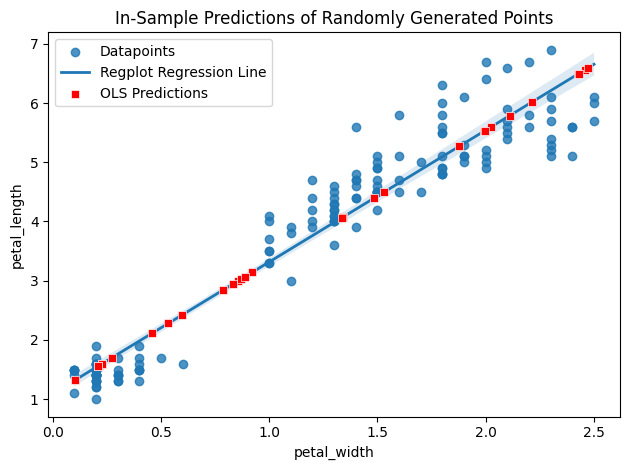

In [20]:
# generating random x-values between min and max of petal width measurements (in-sample points)
random_points = pd.DataFrame(np.random.uniform(min(iris["petal_width"]), max(iris["petal_width"]), 30), columns = ["petal_width"])

# making y-value predictions based on x-values
ypred = model.predict(random_points)

# plotting entire dataset
sns.regplot(iris, 
    x = "petal_width", 
    y = "petal_length", 
    label = "Datapoints", line_kws = dict(linewidth = 2, label = "Regplot Regression Line"))

# plotting predicted points on top, expecting to see them line up with the regression line from regplot
sns.scatterplot(x = random_points["petal_width"], y = ypred, 
    zorder = 10, # high z-order to display points on top of regression line instead of below it
    color = "red", marker = "s", label = "OLS Predictions")

plt.title("In-Sample Predictions of Randomly Generated Points")

plt.tight_layout()

# plt.savefig("assets/in_sample_prediction");